In [23]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [66]:
B = 100e9 # Bitrate [bit/s]
L = 100e3 # Fiber len [m]
beta2 = -0.021e-24 # GVD parameter [s^2/m]
dW = 100e9 # Pulse bandwidth [1/s]
dt = 25e-12 # Time delay multipler [s]

NT = int((1/B + np.abs(L*beta2*dW))/dt) # Number of taps

display(Math('B = %5.2f ~Gbps ~~~|~~~ L = %5.2f ~km ~~~|~~~ΔW = %5.2f~GHz ~~~|~~~Δt = %5.2f~ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12)))
display(Math('N_T = %5.0f' %(NT)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

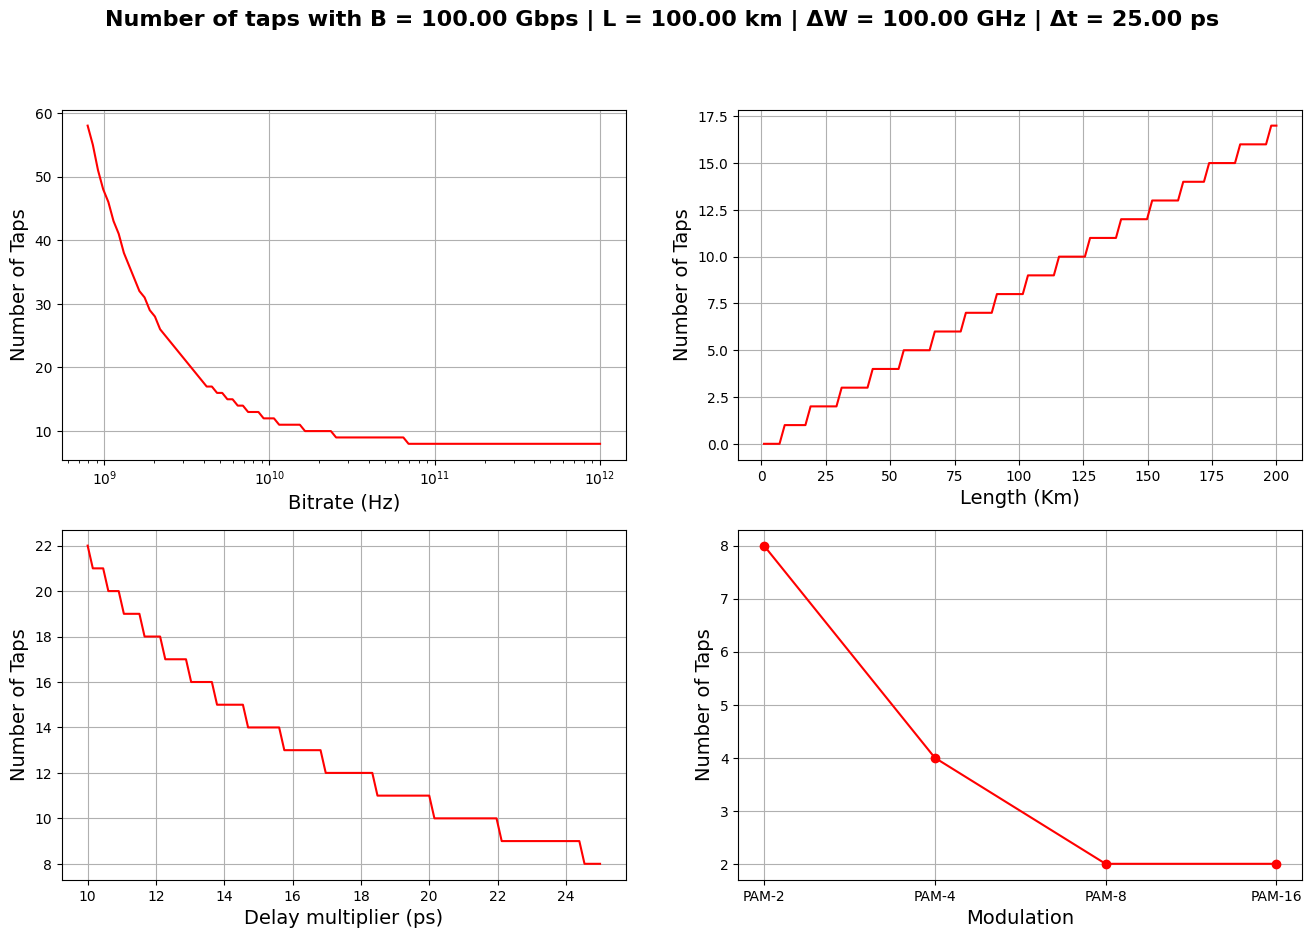

In [86]:
Barray = np.logspace(8.9,12,100)
LArray = np.linspace(1e3,200e3,100)
dtArray = np.linspace(10e-12,25e-12,100)
dWArray = {'PAM-2':1 , 'PAM-4':2, 'PAM-8':3, 'PAM-16':4}

NT1 = np.floor((1/Barray + np.abs(L*beta2*dW))/dt) # Number of taps (varying B)
NT2 = np.floor((1/B + np.abs(LArray*beta2*dW))/dt) # Number of taps (varying L)
NT3 = np.floor((1/B + np.abs(L*beta2*dW))/dtArray) # Number of taps (varying dt)
NT4 = np.floor((1/B + np.abs(L*beta2*dW/np.array(list(dWArray.values())) )/dt)) # Number of taps (varying modulation / dw)

figure,ax=plt.subplots(2, 2,figsize=(16,10))
figure.suptitle('Number of taps with B = %5.2f Gbps | L = %5.2f km | ΔW = %5.2f GHz | Δt = %5.2f ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12),fontsize=16, fontweight="bold")

ax[0][0].plot(Barray, NT1, 'r', label='Tn')
ax[0][0].set_xlabel(r'Bitrate (Hz)', fontsize=14)
ax[0][0].set_ylabel(r'Number of Taps', fontsize=14)
ax[0][0].set_xscale('log')
ax[0][0].grid(True)

ax[0][1].plot(LArray*1e-3, NT2, 'r', label='Tn')
ax[0][1].set_xlabel(r'Length (Km)', fontsize=14)
ax[0][1].set_ylabel(r'Number of Taps', fontsize=14)
ax[0][1].grid(True)

ax[1][0].plot(dtArray*1e12, NT3, 'r', label='Tn')
ax[1][0].set_xlabel(r'Delay multiplier (ps)', fontsize=14)
ax[1][0].set_ylabel(r'Number of Taps', fontsize=14)
ax[1][0].grid(True)

ax[1][1].plot(np.arange(len(dWArray.values())), NT4, 'ro-', label='Tn')
ax[1][1].set_xlabel(r'Modulation', fontsize=14)
ax[1][1].set_ylabel(r'Number of Taps', fontsize=14)
ax[1][1].set_xticks(np.arange(len(dWArray.values())), labels=dWArray.keys())
ax[1][1].grid(True)

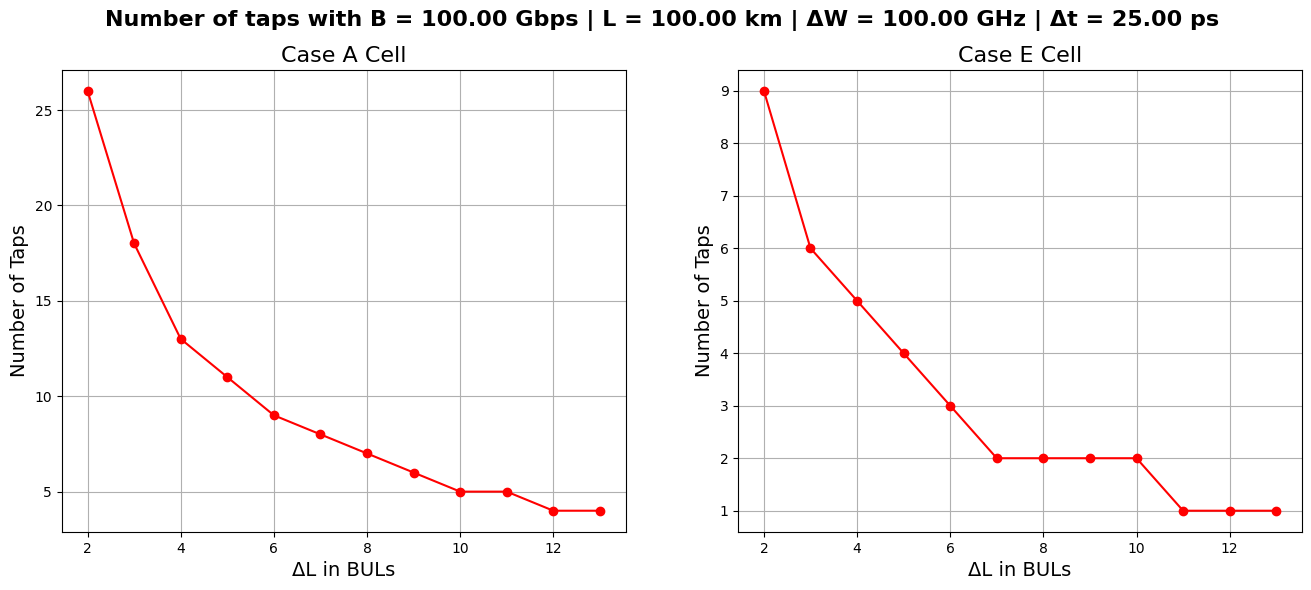

In [102]:
figure,ax=plt.subplots(1, 2,figsize=(16,6))
figure.suptitle('Number of taps with B = %5.2f Gbps | L = %5.2f km | ΔW = %5.2f GHz | Δt = %5.2f ps' %(B/1e9,L/1e3,dW/1e9,dt*1e12),fontsize=16, fontweight="bold")

dLs = 12  # max ΔL in BULs
startL = 2 # min ΔL in BULs
dtArray1 = np.linspace(startL*4.18e-12,dLs*4.18e-12,dLs)
dtArray2 = np.linspace(startL*11.25e-12,dLs*11.25e-12,dLs)

NT5 = np.floor((1/B + np.abs(L*beta2*dW))/dtArray1) # Number of taps (varying dt case A)
NT6 = np.floor((1/B + np.abs(L*beta2*dW))/dtArray2) # Number of taps (varying dt case E)

ax[0].plot(np.arange(dLs)+startL, NT5, 'ro-', label='Tn')
ax[0].set_title('Case A Cell', fontsize=16)
ax[0].set_xlabel(r'ΔL in BULs', fontsize=14)
ax[0].set_ylabel(r'Number of Taps', fontsize=14)
ax[0].grid(True)

ax[1].plot(np.arange(dLs)+startL, NT6, 'ro-', label='Tn')
ax[1].set_title('Case E Cell', fontsize=16)
ax[1].set_xlabel(r'ΔL in BULs', fontsize=14)
ax[1].set_ylabel(r'Number of Taps', fontsize=14)
ax[1].grid(True)